# Prosper's loan APR statistics
## by Alaa Sayed

## Investigation Overview

> The presentation's goal is to show the effect of some factors on the calculation of the APR

## Dataset Overview

> This [data set](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1611859174834000&usg=AOvVaw1BF_rdNDnuEPhjYmfLq2_M) contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI) explains the variables in the data set.
You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
columns_from_prosper_dict = ['ListingKey','ListingCreationDate','Term','BorrowerAPR'
                             ,'LoanOriginalAmount','TotalProsperLoans','StatedMonthlyIncome']
date_cols = ['ListingCreationDate']

df = pd.read_csv('prosperLoanData.csv',parse_dates=date_cols)
df = df[columns_from_prosper_dict]

df.drop_duplicates(inplace=True)
df= df.drop(columns=['ListingKey', 'ListingCreationDate'])
df= df.rename(columns={'BorrowerAPR':'APR','LoanOriginalAmount':'Amount','TotalProsperLoans':'Loans','StatedMonthlyIncome':'Income'})

nan_rows = df[df['Amount'].isnull()]
if(len(nan_rows)):
    df=df[df.Amount.notna()]
    
df.Loans=df.Loans.fillna(0)

df = df[df.Loans<6]

## Borrower APR's distribution

> The borrower's APR distribution is bimodal with peaks at 0.2,0.35

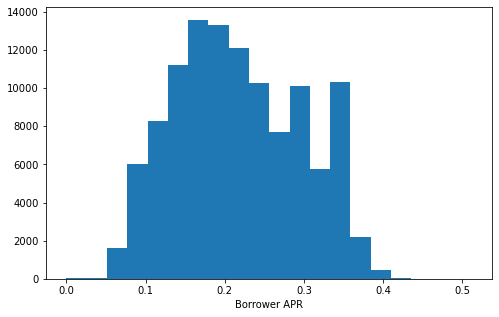

In [3]:
binsize = df['APR'].max()/20
bins = np.arange(0, df['APR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'APR', bins = bins)
plt.xlabel('Borrower APR')
plt.show()

## Borrower APR's vs amount of loan

> As expected the higher the loan's amount the lower the APR which is to encourage investors

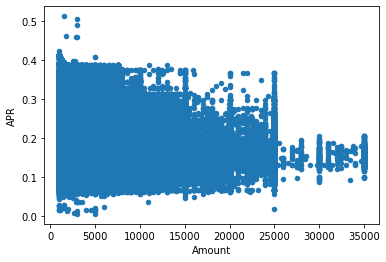

In [4]:
df.plot(x='Amount',y='APR',kind='scatter');

## Borrower APR's vs loan's term

> A36 months term is the most common loan

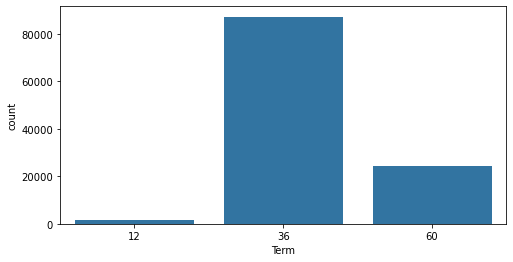

In [5]:
fig, ax = plt.subplots(nrows=1, figsize = [8,4])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Term', color = default_color)
plt.show()

## Borrower APR vs loan's term taking the amount of the loan in regard

> it seems like the 36 months borrower's term has the highest APR rate, maybe more exceptions are given to other loans as the 36 months term is the most common

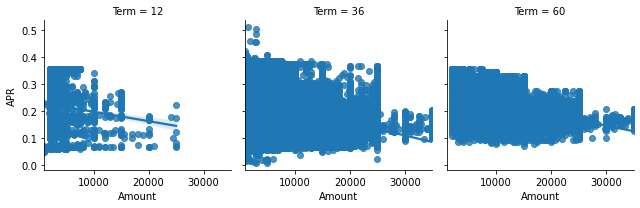

In [6]:
# create faceted heat maps on levels of the Term variable
g=sb.FacetGrid(data=df, col='Term')
g.map(sb.regplot, 'Amount', 'APR');
plt.show();

## Borrower APR vs number of current loans for the client taking the amount of the loan in regard

> it seems like the number of loans relaxes the rate of decline of the borrower's APR with respect to the amount of loan

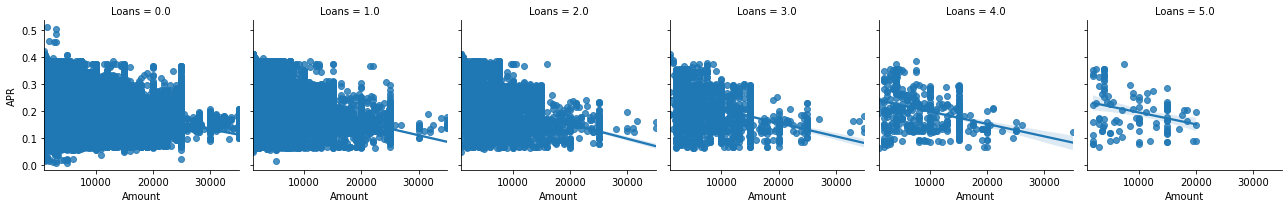

In [7]:
# create faceted heat maps on levels of the Loans variable
g=sb.FacetGrid(data=df, col='Loans')
g.map(sb.regplot, 'Amount', 'APR');
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!